Write a program for erosion and dilation, opening & closing WITHOUT using inbuilt  function.

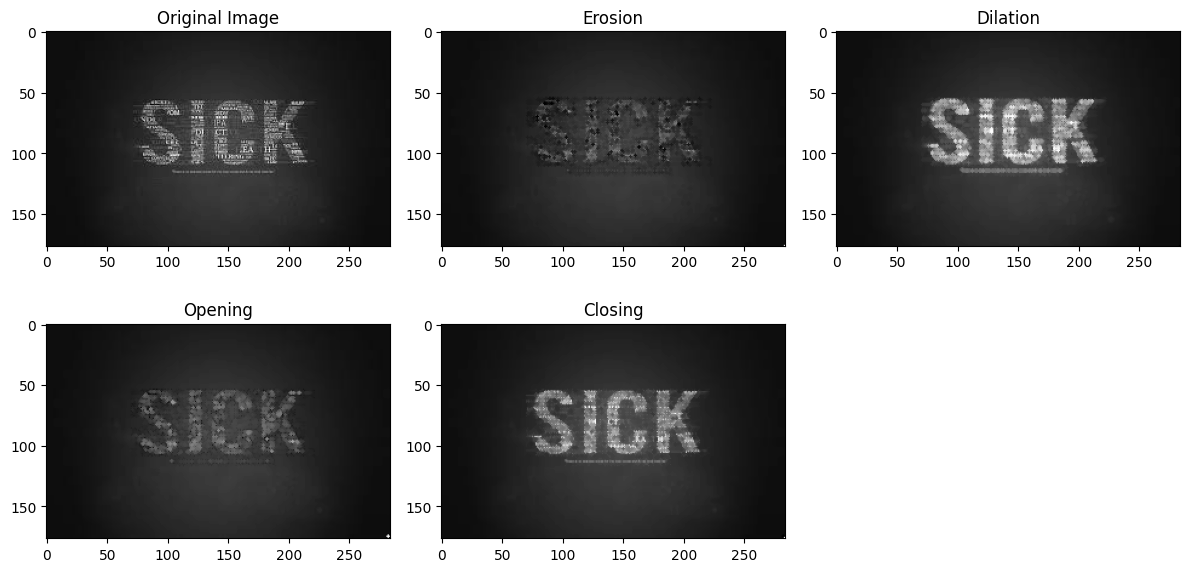

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # Only for Google Colab
import matplotlib.pyplot as plt

# Define a function for erosion
def erosion(image, kernel):
    rows, cols = image.shape
    krows, kcols = kernel.shape
    result = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            min_val = 255
            for m in range(krows):
                for n in range(kcols):
                    if kernel[m, n] == 1:
                        if 0 <= i + m < rows and 0 <= j + n < cols:
                            min_val = min(min_val, image[i + m, j + n])
            result[i, j] = min_val

    return result

# Define a function for dilation
def dilation(image, kernel):
    rows, cols = image.shape
    krows, kcols = kernel.shape
    result = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            max_val = 0
            for m in range(krows):
                for n in range(kcols):
                    if kernel[m, n] == 1:
                        if 0 <= i + m < rows and 0 <= j + n < cols:
                            max_val = max(max_val, image[i + m, j + n])
            result[i, j] = max_val

    return result

# Define a function for opening
def opening(image, kernel):
    eroded = erosion(image, kernel)
    opened = dilation(eroded, kernel)
    return opened

# Define a function for closing
def closing(image, kernel):
    dilated = dilation(image, kernel)
    closed = erosion(dilated, kernel)
    return closed

# Read an image (replace 'image_path' with your image file path)
# Read an image (replace 'image_path' with your image file path)
image = cv2.imread('/content/download (4).jfif', cv2.IMREAD_GRAYSCALE)

# Define a binary kernel (structuring element)
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Perform operations
eroded_image = erosion(image, kernel)
dilated_image = dilation(image, kernel)
opened_image = opening(image, kernel)
closed_image = closing(image, kernel)

# Display the results using subplots
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

# Erosion result
plt.subplot(2, 3, 2)
plt.title('Erosion')
plt.imshow(eroded_image, cmap='gray')

# Dilation result
plt.subplot(2, 3, 3)
plt.title('Dilation')
plt.imshow(dilated_image, cmap='gray')

# Opening result
plt.subplot(2, 3, 4)
plt.title('Opening')
plt.imshow(opened_image, cmap='gray')

# Closing result
plt.subplot(2, 3, 5)
plt.title('Closing')
plt.imshow(closed_image, cmap='gray')

plt.tight_layout()
plt.show()
